In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
diabete_df=pd.read_csv("diabetes_012_health_indicators_BRFSS2015.csv")

In [3]:
#Cleaning_data
#There were no Null_Values in the DataSet
#To understand How Many Rows are duplicated
diabete_df.duplicated(subset=['Diabetes_012','HighBP','HighChol','CholCheck','BMI','Smoker','Stroke',
                              'HeartDiseaseorAttack','PhysActivity','Fruits','Veggies','HvyAlcoholConsump','AnyHealthcare','NoDocbcCost','GenHlth','MentHlth',
                              'PhysHlth','DiffWalk','Sex','Age','Education','Income']).sum()

23899

In [4]:
#clean duplicated rows and resetting the index
diabete_df_clean=diabete_df.drop_duplicates()
diabete_df_clean.reset_index(drop=True,inplace=True)
diabete_df_clean

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229776,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
229777,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
229778,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
229779,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [14]:
#Diabete Status
# No Diabete=0
# Pre Diabete=1
# Diabete = 2
diabete_type_detection=diabete_df_clean['Diabetes_012']
diabete_df_clean.loc[diabete_type_detection==0,'Disease Status']='No Diabete'
diabete_df_clean.loc[diabete_type_detection==1,'Disease Status']='Pre Diabete'
diabete_df_clean.loc[diabete_type_detection==2,'Disease Status']='Diabete'
#Look at distribution of members
diabete_df_clean['Disease Status'].value_counts()

No Diabete     190055
Diabete         35097
Pre Diabete      4629
Name: Disease Status, dtype: int64

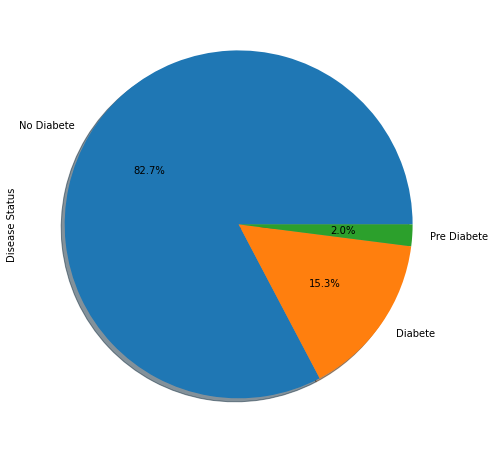

In [15]:
diabete_df_clean['Disease Status'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,figsize=(10,8))
plt.show()

In [14]:
#Decesion Tree
from sklearn.tree import DecisionTreeClassifier

In [15]:
x = diabete_df_clean.iloc[:, [1, 2, 3, 4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]].values  
y = diabete_df_clean.iloc[:, 0].values 

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
abc = DecisionTreeClassifier(random_state=2)
model = abc.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("Accuracy using DecisionTree:",metrics.accuracy_score(y_test, y_pred)*100, "%")

Accuracy using DecisionTree: 75.5624864002321 %


In [11]:
#Model 2 : Naive-Bayse
from sklearn import metrics
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import confusion_matrix  

In [21]:
x = diabete_df_clean.iloc[:, [1, 2, 3, 4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]].values  
y = diabete_df_clean.iloc[:, 0].values  

x1 = diabete_df_clean.iloc[:, [1]].values  
x2 = diabete_df_clean.iloc[:, [2]].values
x3 = diabete_df_clean.iloc[:, [3]].values
x4 = diabete_df_clean.iloc[:, [4]].values
x5 = diabete_df_clean.iloc[:, [5]].values
x6 = diabete_df_clean.iloc[:, [6]].values
x7 = diabete_df_clean.iloc[:, [7]].values
x8 = diabete_df_clean.iloc[:, [8]].values
x9 = diabete_df_clean.iloc[:, [9]].values
x10 = diabete_df_clean.iloc[:, [10]].values
x11 = diabete_df_clean.iloc[:, [11]].values
x12 = diabete_df_clean.iloc[:, [12]].values
x13 = diabete_df_clean.iloc[:, [13]].values
x14 = diabete_df_clean.iloc[:, [14]].values
x15 = diabete_df_clean.iloc[:, [15]].values
x16 = diabete_df_clean.iloc[:, [16]].values
x17 = diabete_df_clean.iloc[:, [17]].values
x18 = diabete_df_clean.iloc[:, [18]].values
x19 = diabete_df_clean.iloc[:, [19]].values

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)  

In [31]:
from sklearn.naive_bayes import GaussianNB  
classifier = GaussianNB()  
classifier.fit(x_train, y_train)  
y_pred = classifier.predict(x_test) 

In [32]:
y_pred = classifier.predict(x_test) 
print(y_pred)

[2. 0. 0. ... 0. 2. 2.]


In [33]:
cm = confusion_matrix(y_test, y_pred)  
print(cm)

[[37472   253  9550]
 [  663     5   477]
 [ 3821   110  5095]]


In [34]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7410785781429516


In [5]:
#Use adaboosting
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [6]:
x = diabete_df_clean.iloc[:, [1, 2, 3, 4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]].values  
y = diabete_df_clean.iloc[:, 0].values 

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
Adaboost_Classifier = AdaBoostClassifier(n_estimators=70,learning_rate=1)

In [8]:
model = Adaboost_Classifier.fit(x_train, y_train)


In [9]:
y_pred = model.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100, "%")

Accuracy: 83.21752375426126 %


In [ ]:
#Until Now, I used 3 MODELS
#Decesion tree=75.2 %, 
#NaiveBayes=74.1%
#Adaboosting=83.2%
#The max Model was Related to Adaboosting with 83.21 Percent Accuracy
#####################################################################
#The Second approach is to use a dataframe which (pre-diabete/diabete/no-diabete) observations are equal
#And investigate the Models